In [ ]:
## CREDIT: https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [60]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.downloader.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/longtran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/longtran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
BEARER_TOKEN = "xxxxx"
auth = tweepy.OAuth2BearerHandler(BEARER_TOKEN)
api = tweepy.API(auth)


In [62]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

count = 100
query = '(#pepsi OR #coke OR #cocacola) -filter:retweets'
tweets = api.search_tweets(q=query, lang='en', locale="usa", count=count, tweet_mode="extended")
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
    try:
        text = tweet.retweeted_status.full_text
    except AttributeError:  # Not a Retweet:
        text = tweet.full_text
    tweet_list.append(text)
    analysis = TextBlob(text)
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(text)
        negative += 1
    elif pos > neg:
        positive_list.append(text)
        positive += 1
 
    elif pos == neg:
        neutral_list.append(text)
        neutral += 1
positive = percentage(positive, count)
negative = percentage(negative, count)
neutral = percentage(neutral, count)
polarity = percentage(polarity, count)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [63]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  51
negative number:  13
neutral number:  36


In [64]:
tweet_list

,0
0,@KumaMkundu @awake_jo @benvmeelen @YouTube Yes...
1,@callykarishokka\n“FunTime:PuffPuggleNettle&am...
2,So good I had to share! Check out all the item...
3,@callykarishokka\n“FunTime:PuffPuggleNettle&am...
4,Check out Vintage 1971 Yellow Pepsi Cola Wood ...
...,...
95,"#Varun Beverages, a subsidiary #RJ CORP settin..."
96,Do you know this Coke Bottle from Argentina (A...
97,So good I had to share! Check out all the item...
98,#Pepsi \nI think bug game is good https://t.co...


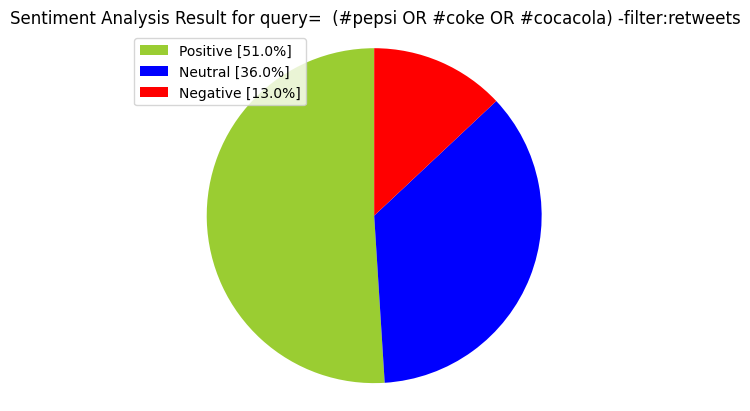

In [65]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for query=  "+query+"" )
plt.axis('equal')
plt.show()

In [66]:
tweet_list.drop_duplicates(inplace = True)

In [67]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@KumaMkundu @awake_jo @benvmeelen @YouTube Yes...,@KumaMkundu @awake_jo @benvmeelen @YouTube Yes...
1,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,@callykarishokka\n“FunTime:PuffPuggleNettle&am...
2,So good I had to share! Check out all the item...,So good I had to share! Check out all the item...
3,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,@callykarishokka\n“FunTime:PuffPuggleNettle&am...
4,Check out Vintage 1971 Yellow Pepsi Cola Wood ...,Check out Vintage 1971 Yellow Pepsi Cola Wood ...
...,...,...
95,"#Varun Beverages, a subsidiary #RJ CORP settin...","#Varun Beverages, a subsidiary #RJ CORP settin..."
96,Do you know this Coke Bottle from Argentina (A...,Do you know this Coke Bottle from Argentina (A...
97,So good I had to share! Check out all the item...,So good I had to share! Check out all the item...
98,#Pepsi \nI think bug game is good https://t.co...,#Pepsi \nI think bug game is good https://t.co...


In [68]:
tweet_list

,0,text
0,@KumaMkundu @awake_jo @benvmeelen @YouTube Yes...,@KumaMkundu @awake_jo @benvmeelen @YouTube Yes...
1,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,@callykarishokka\n“FunTime:PuffPuggleNettle&am...
2,So good I had to share! Check out all the item...,So good I had to share! Check out all the item...
3,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,@callykarishokka\n“FunTime:PuffPuggleNettle&am...
4,Check out Vintage 1971 Yellow Pepsi Cola Wood ...,Check out Vintage 1971 Yellow Pepsi Cola Wood ...
...,...,...
95,"#Varun Beverages, a subsidiary #RJ CORP settin...","#Varun Beverages, a subsidiary #RJ CORP settin..."
96,Do you know this Coke Bottle from Argentina (A...,Do you know this Coke Bottle from Argentina (A...
97,So good I had to share! Check out all the item...,So good I had to share! Check out all the item...
98,#Pepsi \nI think bug game is good https://t.co...,#Pepsi \nI think bug game is good https://t.co...


In [69]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@KumaMkundu @awake_jo @benvmeelen @YouTube Yes...,jo yes the dealers of coke
1,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,funtime puffpugglenettle amp puggle vehicut...
2,So good I had to share! Check out all the item...,so good i had to share check out all the item...
3,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,funtime puffpugglenettle amp puggle vehicut...
4,Check out Vintage 1971 Yellow Pepsi Cola Wood ...,check out vintage 1971 yellow pepsi cola wood ...
5,"A great horror movie, popcorn, and coke!😱 \n#n...",a great horror movie popcorn and coke nf...
6,That first sip of #pepsi,that first sip of pepsi
7,Check out Gibson Coca Cola Plastic Tumbler Cup...,check out gibson coca cola plastic tumbler cup...
8,#story #CocaCola #upgrade #customized #arthugo...,story cocacola upgrade customized arthugo...
9,#IU x #PEPSI POSTER??!!!/^/;/&amp;_-￦_￦_;￦---￦...,iu x pepsi poster amp ...


In [70]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@KumaMkundu @awake_jo @benvmeelen @YouTube Yes...,jo yes the dealers of coke,0.000000,0.000000,positive,0.000,0.649,0.351,0.4019
1,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,funtime puffpugglenettle amp puggle vehicut...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,So good I had to share! Check out all the item...,so good i had to share check out all the item...,0.650000,0.775000,positive,0.000,0.633,0.367,0.8516
3,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,funtime puffpugglenettle amp puggle vehicut...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,Check out Vintage 1971 Yellow Pepsi Cola Wood ...,check out vintage 1971 yellow pepsi cola wood ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,"A great horror movie, popcorn, and coke!😱 \n#n...",a great horror movie popcorn and coke nf...,0.800000,0.750000,negative,0.329,0.489,0.182,-0.5106
6,That first sip of #pepsi,that first sip of pepsi,0.250000,0.333333,neutral,0.000,1.000,0.000,0.0000
7,Check out Gibson Coca Cola Plastic Tumbler Cup...,check out gibson coca cola plastic tumbler cup...,-0.083333,0.250000,neutral,0.000,1.000,0.000,0.0000
8,#story #CocaCola #upgrade #customized #arthugo...,story cocacola upgrade customized arthugo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,#IU x #PEPSI POSTER??!!!/^/;/&amp;_-￦_￦_;￦---￦...,iu x pepsi poster amp ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [71]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [72]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [73]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,51,51.0
neutral,29,29.0
negative,20,20.0


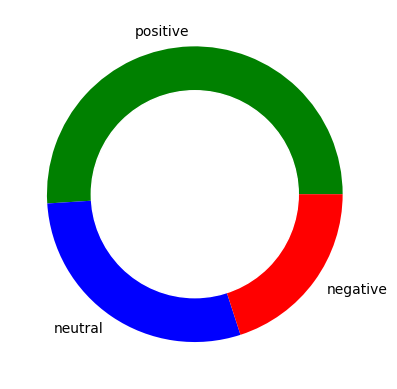

In [74]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [75]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


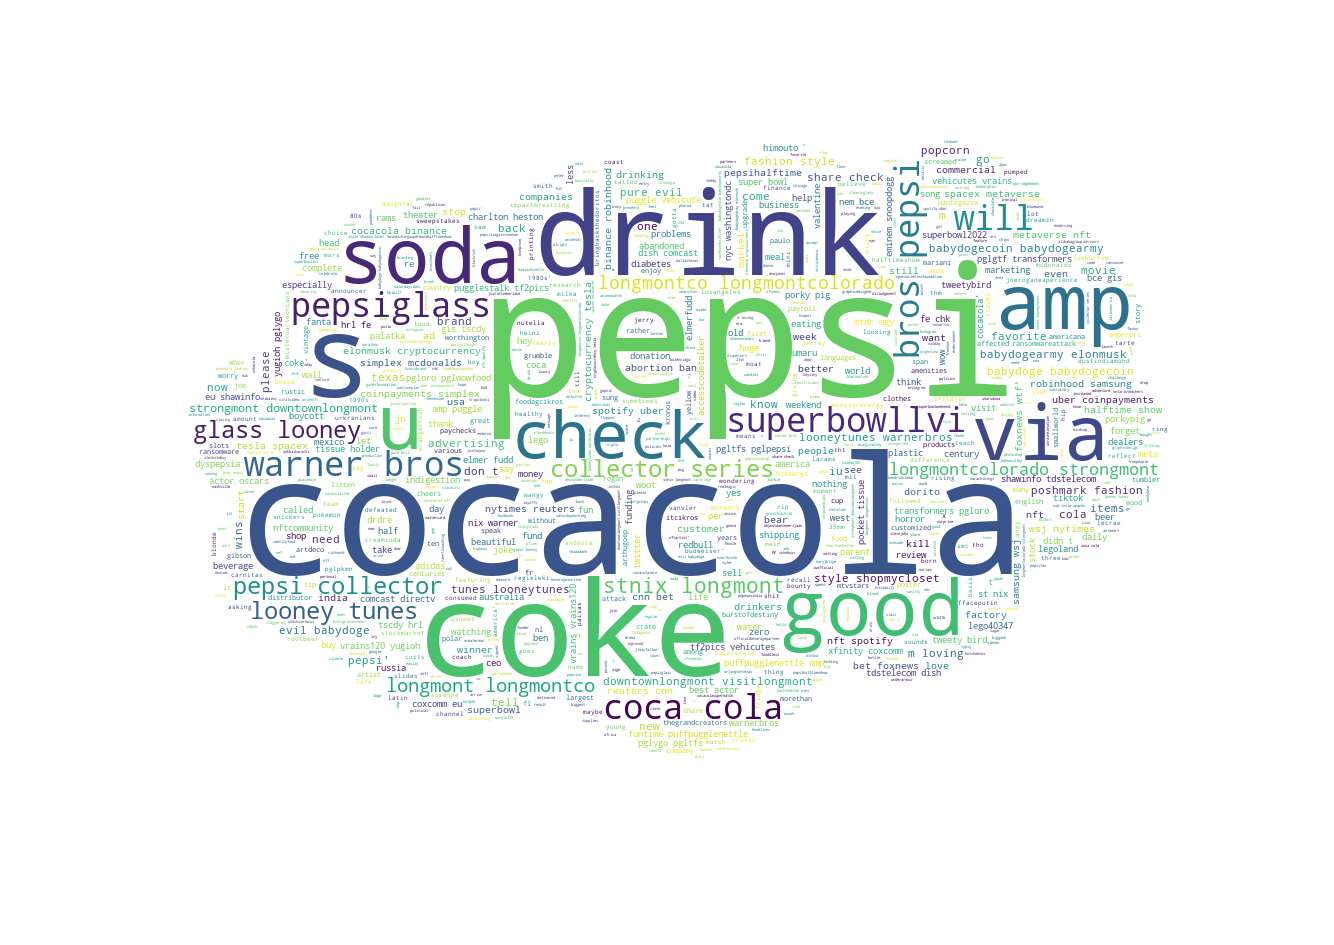

In [76]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


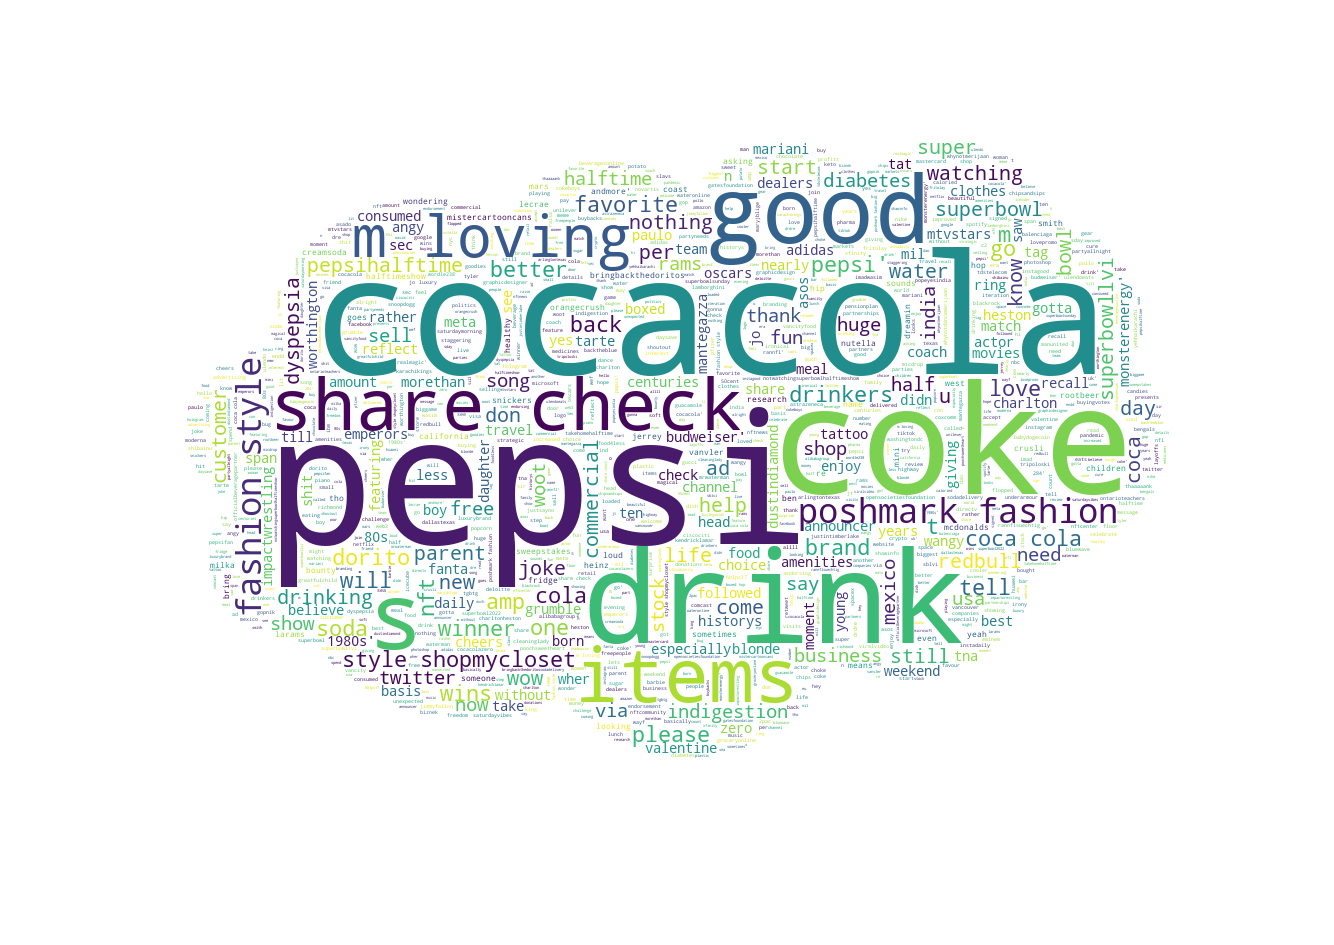

In [77]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


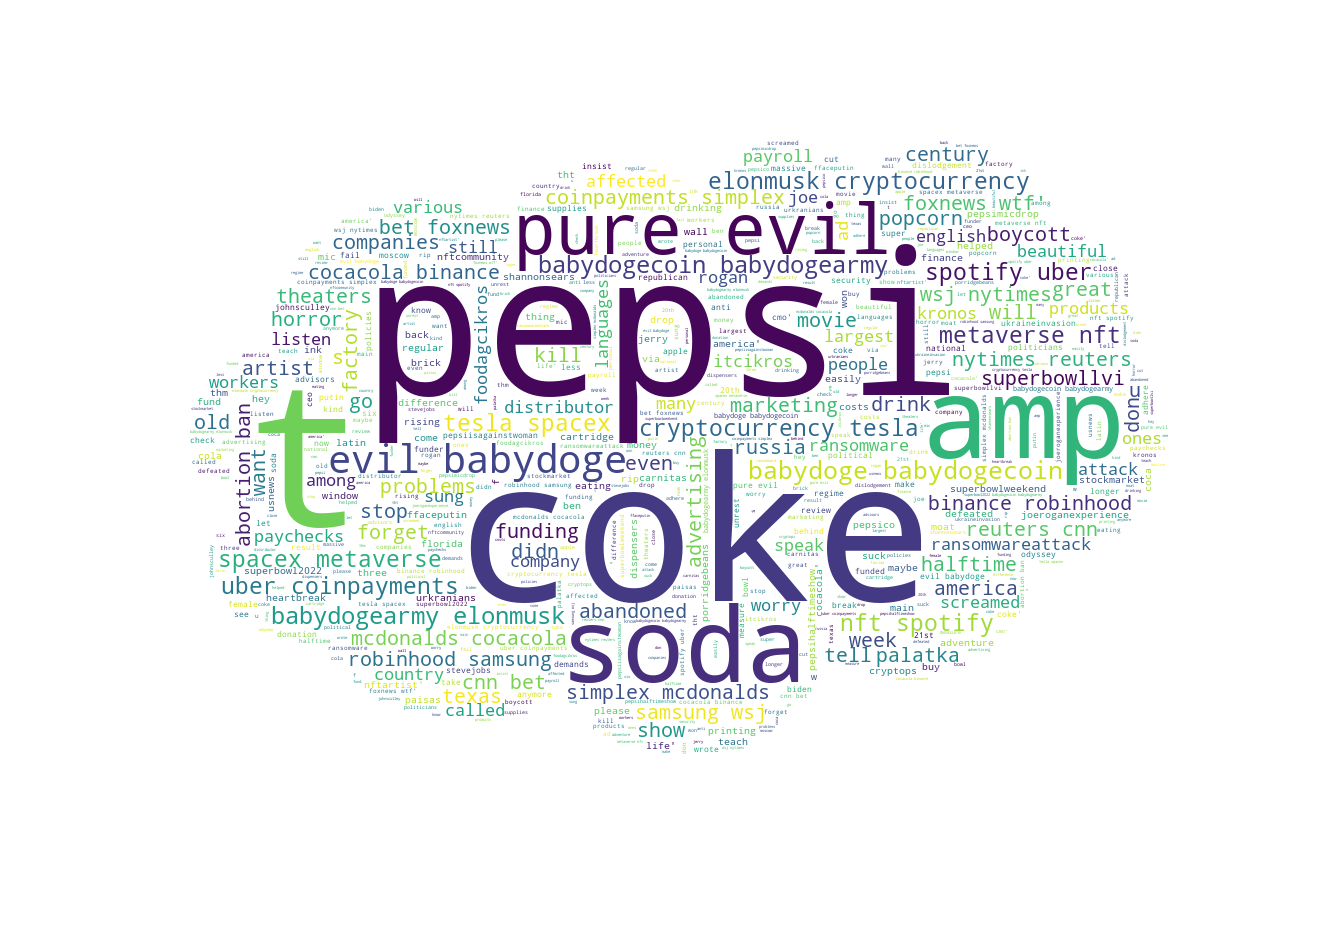

In [78]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


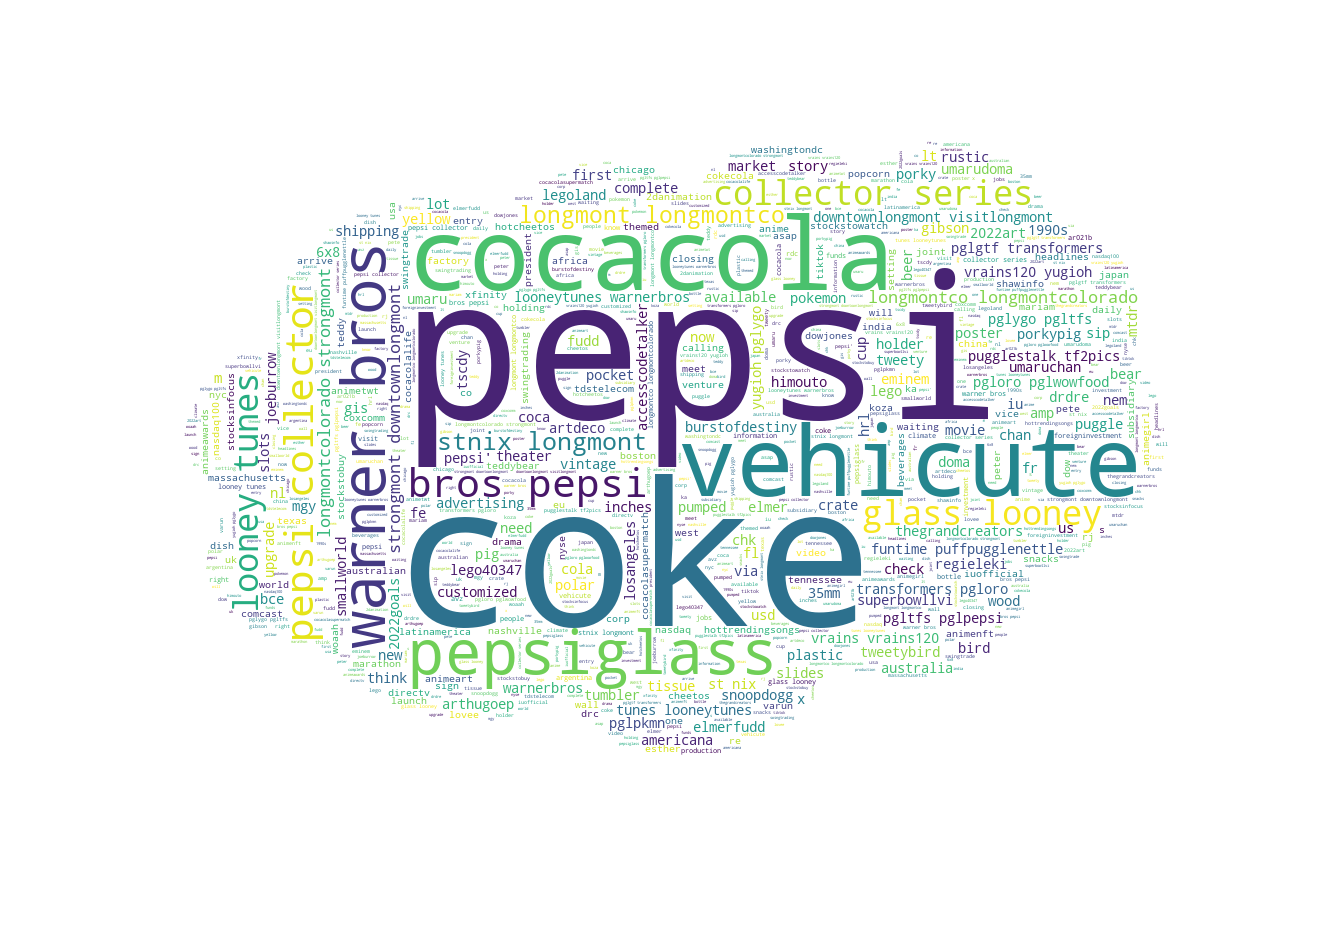

In [79]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [80]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [81]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,183.40
neutral,154.79
positive,152.43


In [82]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,26.00
neutral,19.62
positive,23.22


In [83]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [84]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [85]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [86]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [87]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [88]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@KumaMkundu @awake_jo @benvmeelen @YouTube Yes...,jo yes the dealers of coke,0.00,0.000,positive,0.0,0.649,0.351,0.4019,42,6,jo yes the dealers of coke,"[, jo, yes, the, dealers, of, coke, ]","[, jo, yes, dealers, coke, ]","[, jo, ye, dealer, coke, ]"
1,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,funtime puffpugglenettle amp puggle vehicut...,0.00,0.000,neutral,0.0,1.000,0.000,0.0000,271,29,funtime puffpugglenettle amp puggle vehicut...,"[, funtime, puffpugglenettle, amp, puggle, veh...","[, funtime, puffpugglenettle, amp, puggle, veh...","[, funtim, puffpugglenettl, amp, puggl, vehicu..."
2,So good I had to share! Check out all the item...,so good i had to share check out all the item...,0.65,0.775,positive,0.0,0.633,0.367,0.8516,137,22,so good i had to share check out all the item...,"[so, good, i, had, to, share, check, out, all,...","[good, share, check, items, loving, poshmark, ...","[good, share, check, item, love, poshmark, fas..."
3,@callykarishokka\n“FunTime:PuffPuggleNettle&am...,funtime puffpugglenettle amp puggle vehicut...,0.00,0.000,neutral,0.0,1.000,0.000,0.0000,258,28,funtime puffpugglenettle amp puggle vehicut...,"[, funtime, puffpugglenettle, amp, puggle, veh...","[, funtime, puffpugglenettle, amp, puggle, veh...","[, funtim, puffpugglenettl, amp, puggl, vehicu..."
4,Check out Vintage 1971 Yellow Pepsi Cola Wood ...,check out vintage 1971 yellow pepsi cola wood ...,0.00,0.000,neutral,0.0,1.000,0.000,0.0000,105,17,check out vintage yellow pepsi cola wood ship...,"[check, out, vintage, yellow, pepsi, cola, woo...","[check, vintage, yellow, pepsi, cola, wood, sh...","[check, vintag, yellow, pepsi, cola, wood, shi..."


In [89]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

100 Number of reviews has 842 words


In [90]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/Volumes/Data/PersonalProjects/MarketingResearch/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,abandon,abort,accept,accesscodetalk,actor,ad,adher,adida,adventur,...,x,xfiniti,ye,yeah,year,yehhaikarachi,yellow,young,yugioh,zero
0,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [91]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
pepsi,79
cocacola,39
coke,34
drink,16
amp,12
check,11
cola,11
nft,11
love,10
good,9


In [92]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [93]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('coca cola', 6),
 ('000 000', 6),
 ('1973 warner', 6),
 ('warner bros', 6),
 ('bros pepsi', 6),
 ('pepsi collector', 6),
 ('collector series', 6),
 ('glass looney', 6),
 ('looney tunes', 6),
 ('stnix longmont', 6),
 ('longmont longmontco', 6),
 ('longmontco longmontcolorado', 6),
 ('longmontcolorado strongmont', 6),
 ('strongmont downtownlongmont', 6),
 ('downtownlongmont visitlongmont', 6),
 ('good share', 5),
 ('share check', 5),
 ('check items', 5),
 ('items loving', 5),
 ('loving poshmark', 5)]

In [94]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('1973 warner bros', 6),
 ('warner bros pepsi', 6),
 ('bros pepsi collector', 6),
 ('pepsi collector series', 6),
 ('glass looney tunes', 6),
 ('stnix longmont longmontco', 6),
 ('longmont longmontco longmontcolorado', 6),
 ('longmontco longmontcolorado strongmont', 6),
 ('longmontcolorado strongmont downtownlongmont', 6),
 ('strongmont downtownlongmont visitlongmont', 6),
 ('good share check', 5),
 ('share check items', 5),
 ('check items loving', 5),
 ('items loving poshmark', 5),
 ('loving poshmark fashion', 5),
 ('poshmark fashion style', 5),
 ('fashion style shopmycloset', 5),
 ('000 000 000', 5),
 ('style shopmycloset cocacola', 4),
 ('looney tunes looneytunes', 4)]